In [87]:
import os
import json
from time import time

import pandas as pd
import rucio.client
import joblib
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

from physlite_experiments.physlite_events import (
    physlite_events, get_lazy_form, get_branch_forms, Factory, LazyGet
)
from physlite_experiments.analysis_example import get_obj_sel

In [2]:
memory = joblib.Memory("./rucio_cache")

In [3]:
@memory.cache
def get_file_infos(did, rse):
    from tqdm.notebook import tqdm
    
    scope = did.split(".")[0]
    rucio_client = rucio.client.Client()
    file_infos = {}
    for info in rucio_client.list_files(scope, did):
        file_infos[info["name"]] = info
    files = []
    for replica in tqdm(
        rucio_client.list_replicas(
            [{"scope": scope, "name" : did}],
            rse_expression=rse
        ),
        total=len(file_infos)
    ):
        if not replica["states"][rse] == "AVAILABLE":
            raise Exception(f"Not available: {replica}")
        files.append((replica["rses"][rse][0], replica["bytes"], file_infos[replica["name"]]["events"]))
    return files

In [4]:
files = get_file_infos(
    "data17_13TeV.periodK.physics_Main.PhysCont.DAOD_PHYSLITE.grp17_v01_p4309",
    "LRZ-LMU_LOCALGROUPDISK"
)
files = pd.DataFrame(files, columns=["url", "bytes", "events"])

<AxesSubplot:>

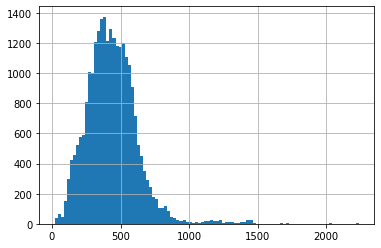

In [5]:
(files.bytes / 1e6).hist(bins=100)

<AxesSubplot:>

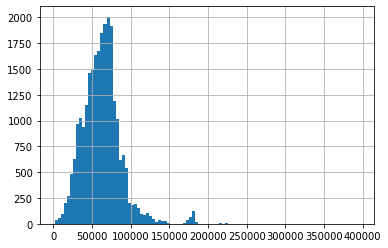

In [6]:
files.events.hist(bins=100)

In [7]:
files.events.sum() / 1e9

1.59628525

In [8]:
files.url

0        root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
1        root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
2        root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
3        root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
4        root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
                               ...                        
25394    root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
25395    root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
25396    root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
25397    root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
25398    root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz...
Name: url, Length: 25399, dtype: object

In [11]:
files.iloc[0].url

'root://lcg-lrz-rootd.grid.lrz.de:1094/pnfs/lrz-muenchen.de/data/atlas/dq2/atlaslocalgroupdisk/rucio/data17_13TeV/26/59/DAOD_PHYSLITE.22958105._000001.pool.root.1'

In [13]:
%%time
events = physlite_events(tree)

Skipping EventInfoAuxDyn.streamTagRobs
Skipping EventInfoAuxDyn.streamTagDets
Can't interpret PrimaryVerticesAuxDyn.neutralParticleLinks
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_03dR30_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_tautsf_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_mu14_ivarloose_tau25_medium1_tracktwo_L1DR-MU10TAU12I_TAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau80_medium1_tracktwo_L1TAU60_tau35_medium1_tracktwo_L1TAU12IM_L1TAU60_DR-TAU20ITAU12IAuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_e17_lhmedium_nod0_ivarloose_tau25_medium1_tracktwo_L1DR-EM15TAU12I-J25AuxDyn.TrigMatchedObjects
CPU times: user 283 ms, sys: 5.19 ms, total: 288 ms
Wall time: 313 ms


In [19]:
events.Electrons.trackParticles.pt

<Array [[], [], [], [], ... 3.93e+03]], [], []] type='44235 * var * var * float32'>

In [14]:
%%time
events_decorated = get_obj_sel(events)

/dss/dsshome1/lxc01/ri23yub/miniconda3/envs/physlite-experiments/lib/python3.8/site-packages/awkward/_connect/_numpy.py:154: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


CPU times: user 6.87 s, sys: 1.09 s, total: 7.96 s
Wall time: 11.7 s


In [15]:
len(events)

44235

In [20]:
form = json.dumps(get_lazy_form(get_branch_forms(tree)))

Skipping EventInfoAuxDyn.streamTagRobs
Skipping EventInfoAuxDyn.streamTagDets
Can't interpret PrimaryVerticesAuxDyn.neutralParticleLinks
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_03dR30_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau35_medium1_tracktwo_tau25_medium1_tracktwo_tautsf_L1DR-TAU20ITAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_mu14_ivarloose_tau25_medium1_tracktwo_L1DR-MU10TAU12I_TAU12I-J25AuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_tau80_medium1_tracktwo_L1TAU60_tau35_medium1_tracktwo_L1TAU12IM_L1TAU60_DR-TAU20ITAU12IAuxDyn.TrigMatchedObjects
Skipping AnalysisHLT_e17_lhmedium_nod0_ivarloose_tau25_medium1_tracktwo_L1DR-EM15TAU12I-J25AuxDyn.TrigMatchedObjects


In [22]:
def subdivide(l, n):
    return [l // n + 1] * (l % n) + [l // n] * (n - l % n)

In [119]:
def run(filename, max_chunksize=10000):
    output = {
        collection: {
            flag : 0
            for flag in ["baseline", "passOR", "signal"]
        } for collection in ["Electrons", "Muons", "Jets"]
    }
    nevents = 0
    with uproot.open(
        f"{filename}:CollectionTree",
        array_cache=None,
        #xrootd_handler=uproot.MultithreadedXRootDSource
        xrootd_handler=uproot.XRootDSource
    ) as tree:
        if tree.num_entries > max_chunksize:
            n_chunks = tree.num_entries // max_chunksize
        else:
            n_chunks = 1
        # now global
        #form = json.dumps(get_lazy_form(get_branch_forms(tree)))
        entry_start = 0
        for num_entries in subdivide(tree.num_entries, n_chunks):
            entry_stop = entry_start + num_entries
            container = LazyGet(
                tree, entry_start=entry_start, entry_stop=entry_stop
            )
            factory = Factory(form, entry_stop - entry_start, container)
            events = factory.events
            events_decorated = get_obj_sel(events)
            entry_start = entry_stop
            for collection in output:
                for flag in output[collection]:
                    output[collection][flag] += ak.count_nonzero(
                        events_decorated[collection][flag]
                    )
            nevents += len(events)
    return output, nevents

In [74]:
%%time
run(files.iloc[1].url)

/dss/dsshome1/lxc01/ri23yub/miniconda3/envs/physlite-experiments/lib/python3.8/site-packages/awkward/_connect/_numpy.py:154: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


CPU times: user 9.78 s, sys: 312 ms, total: 10.1 s
Wall time: 10.1 s


({'Electrons': {'baseline': 4776, 'passOR': 4736, 'signal': 3618},
  'Muons': {'baseline': 8716, 'passOR': 6495, 'signal': 4729},
  'Jets': {'baseline': 249948, 'passOR': 243251, 'signal': 217148}},
 43735)

In [26]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster

In [27]:
cluster = SLURMCluster(walltime="02:00:00", memory="2GB")
#cluster = SLURMCluster()

In [28]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -n 1
#SBATCH --cpus-per-task=1
#SBATCH --mem=2G
#SBATCH -t 02:00:00
#SBATCH --clusters=lcg
#SBATCH --partition=lcg_serial
#SBATCH --qos=lcg_add

/dss/dsshome1/lxc01/ri23yub/miniconda3/envs/physlite-experiments/bin/python3.8 -m distributed.cli.dask_worker tcp://10.156.79.101:40205 --nthreads 1 --memory-limit 2.00GB --name dummy-name --nanny --death-timeout 60 --local-directory $TMPDIR --protocol tcp://



In [29]:
client = Client(cluster)

In [144]:
client.restart()

distributed.scheduler - ERROR - Nannies didn't report back restarted within timeout.  Continuuing with restart process


Client Scheduler: tcp://10.156.79.101:40205 Dashboard: /proxy/8787/status,Cluster Workers: 146 Cores: 146 Memory: 292.00 GB


In [107]:
cluster.scale(200)

In [32]:
cluster

In [145]:
perm = np.random.permutation(len(files))

In [146]:
from dask.distributed import performance_report

with performance_report(filename="dask-report-2.html"):
    start_time = time()
    futures = client.map(run, files.url.iloc[perm[:1000]])
    res = client.gather(futures)
    duration = time() - start_time

In [147]:
duration

160.4557957649231

In [148]:
res[0]

({'Electrons': {'baseline': 4239, 'passOR': 4207, 'signal': 3165},
  'Muons': {'baseline': 6690, 'passOR': 5041, 'signal': 3848},
  'Jets': {'baseline': 102910, 'passOR': 97594, 'signal': 97657}},
 34122)

In [149]:
sum_res = {k : {flag : sum([r[0][k][flag] for r in res]) for flag in v} for k, v in res[0][0].items()}

In [150]:
sum_res

{'Electrons': {'baseline': 7219593, 'passOR': 7151990, 'signal': 5346621},
 'Muons': {'baseline': 12513568, 'passOR': 9322692, 'signal': 6907595},
 'Jets': {'baseline': 310369074, 'passOR': 300607074, 'signal': 274724281}}

In [151]:
sum_events = sum([r[1] for r in res])
sum_events

62890146

In [153]:
sum_events / duration / len(client.nthreads())

1999.728899209255